In [1]:
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

import numpy as np 
import math
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import jdc
from ExerciseAnswers import Answers

pylab.rcParams['figure.figsize'] = 10, 10

#### Helpful Equations

$$F_z = m \ddot{z}$$

$$M_z = I_z \ddot{\psi}$$

$$ \ddot{z} = g- \frac{k_f}{m}\left( \omega_1^2 +\omega_2^2 \right)   \\
   \ddot{\psi} =\frac{k_m}{I_z} (-\omega_1^2 + \omega_2^2 )  $$

In [2]:
class CoaxialCopter:
    
    def __init__(self, 
                 k_f = 0.1, # value of the thrust coefficient
                 k_m = 0.1, # value of the angular torque coefficient
                 m = 0.5,   # mass of the vehicle 
                 i_z = 0.2, # moment of inertia around the z-axis
                ):
        
        self.k_f = k_f
        self.k_m = k_m
        self.m = m
        self.i_z = i_z
        
        self.omega_1 = 0.0
        self.omega_2 = 0.0
        self.g = 9.81
        
        # RECORDING TODO - show the addition of these state variables
        self.z   = 0.0
        self.psi = 0.0
        
        # then realize that we need these...
        self.z_dot = 0.0
        self.psi_dot = 0.0
        
    
    @property
    def z_dot_dot(self):
        """Calculates current vertical acceleration."""
        
        # TODO: 
        # 1. Calculate the lift force generated by the first 
        #    and second propellers 
        # 2. Calculate the total vertical force acting on the drone 
        # 3. Calculate the vertical acceleration due to the 
        #    total force acting on the drone keep in mind that the 
        #    z-axis is directed downward 

        f_1 = self.k_f * self.omega_1**2
        f_2 = self.k_f * self.omega_2**2
        f_g = self.m * self.g
        f_total = -f_1 - f_2 + f_g

        acceleration = f_total / self.m 

        return acceleration
    
    @property
    def psi_dot_dot(self): 
        """Calculates current rotational acceleration."""
        # TODO: 
        # 1. Calculate the torques generated by both propellers 
        # 2. Calculate the angular acceleration 

        cw_torque = self.k_m * self.omega_1 **2
        ccw_torque = self.k_m * self.omega_2 **2

        net_torque = ccw_torque - cw_torque
        angular_acc = net_torque / self.i_z

        return angular_acc
    
    def set_rotors_angular_velocities(self, linear_acc, angular_acc): 
        """
        Sets the turn rates for the rotors so that the drone
        achieves the desired linear_acc and angular_acc.
        """
        
        # TODO 
        # 1. Calculate the correct values of omega_1 and omega_2
        # 2. Set self.omega_1 and self.omega_2 to those values
        # 3. Don't forget to return omega_1, omega_2
        
        term_1 = self.m * (-linear_acc + self.g) /(2 * self.k_f)
        term_2 = self.i_z * angular_acc/(2 * self.k_m)

        omega_1 = math.sqrt(term_1 + term_2)
        omega_2 = math.sqrt(term_1 - term_2)

        self.omega_1 = -omega_1
        self.omega_2 = omega_2

        return self.omega_1, self.omega_2
    
    def advance_state_uncontrolled(self, dt):
        # RECORDING TODO - fill out this function
        z_dot_dot = 9.81
        
        delta_z_dot = dt * z_dot_dot
        self.z_dot += delta_z_dot
        
        delta_z = self.z_dot * dt
        self.z += delta_z
        
    def advance_state(self,dt):
        
        delta_z_dot = self.z_dot_dot * dt 
        self.z_dot += delta_z_dot
        
        delta_z = self.z_dot * dt
        self.z += delta_z 
        
        delta_psi_dot = self.psi_dot_dot * dt 
        self.psi_dot += delta_psi_dot
        
        delta_psi = self.psi_dot* dt 
        self.psi += delta_psi
        
        

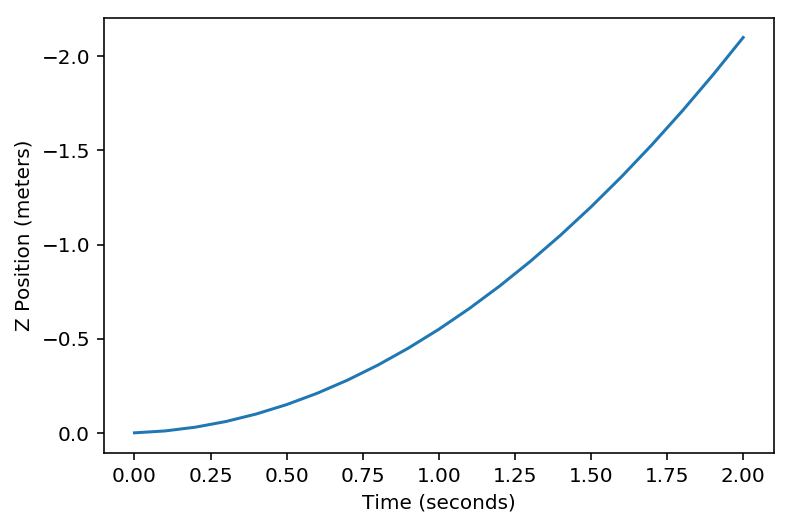

In [6]:

t = np.linspace(0.0,2.0,21)
dt = 0.1

bi = CoaxialCopter()

bi.set_rotors_angular_velocities(-1, 0)

z_history = []
for i in range(t.shape[0]):
    z_history.append(bi.z)
    #bi.advance_state_uncontrolled(dt)
    bi.advance_state(dt)

plt.plot(t,z_history)
plt.ylabel("Z Position (meters)")
plt.xlabel("Time (seconds)")
plt.gca().invert_yaxis()
plt.show()